In [37]:
from IPython.display import display
from IPython.display import Image
import pydotplus

from subprocess import call

import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns


from sklearn.externals.six import StringIO 
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report,accuracy_score, f1_score 
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB,GaussianNB

from sklearn import tree
from sklearn.tree import export_graphviz
import string
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

from mpl_toolkits.mplot3d import Axes3D

np.random.seed(0)

from sklearn.utils.testing import all_estimators
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords 
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet') 
from nltk.probability import FreqDist
from nltk.corpus import stopwords

from matplotlib import cm

from itertools import combinations, product

import statsmodels.api as sm
from statsmodels.formula.api import ols
!pip install yellowbrick
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jesus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jesus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jesus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df_train = pd.read_csv("train.tsv", sep = '\t')
df_test = pd.read_csv("test.tsv", sep = '\t')
df_train.shape
df_train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


# Data Cleaning

In [3]:
# Check the Feature Type and Null Value
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [4]:
df_train.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

# Data Description

0) Price : my target-variable

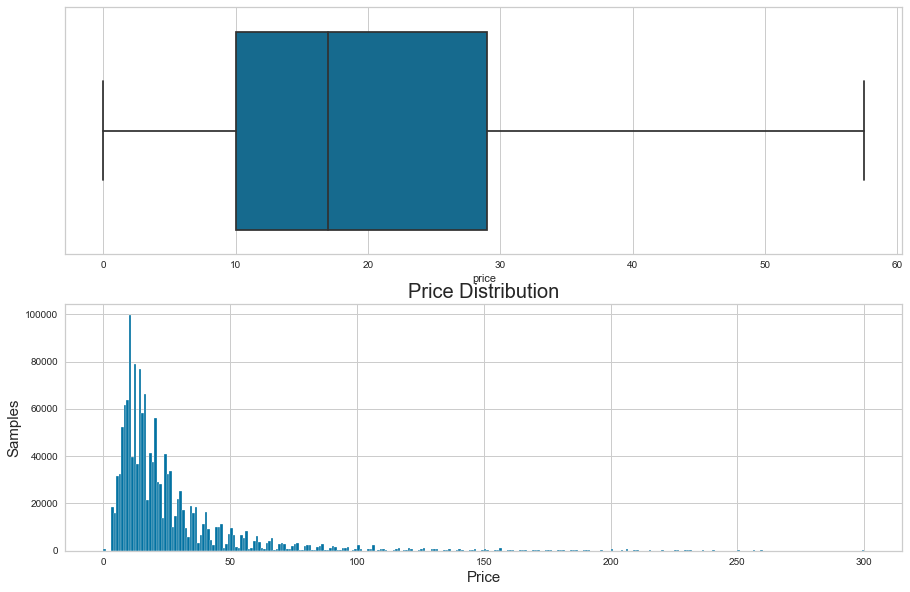

In [5]:
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
sns.boxplot(df_train.price, showfliers = False, ax = ax[0])
ax[1].hist(df_train.price, bins = 300, range = [0, 300], label = "price")
ax[1].set_title("Price Distribution", fontsize = 20)
ax[1].set_xlabel("Price", fontsize = 15)
ax[1].set_ylabel("Samples", fontsize = 15)
plt.show()

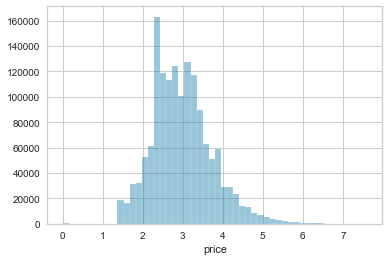

In [6]:
#Since the Price is Right skewed . Here i apply the Log transformation onto the price.
df_train.price= np.log1p(df_train.price)
sns.distplot(df_train.price, kde=False)

In [7]:
# Now, it looks like normal distribution now
df_train.price = np.log1p(df_train.price)
df_train.price.head()

0    1.223156
1    1.603479
2    1.223156
3    1.522467
4    1.570003
Name: price, dtype: float64

In [8]:
y_train = np.log1p(df_train.price)

1) item_condition_id

In [9]:
df_train['item_condition_id'].value_counts()

1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64

NameError: name 'mercari_df' is not defined

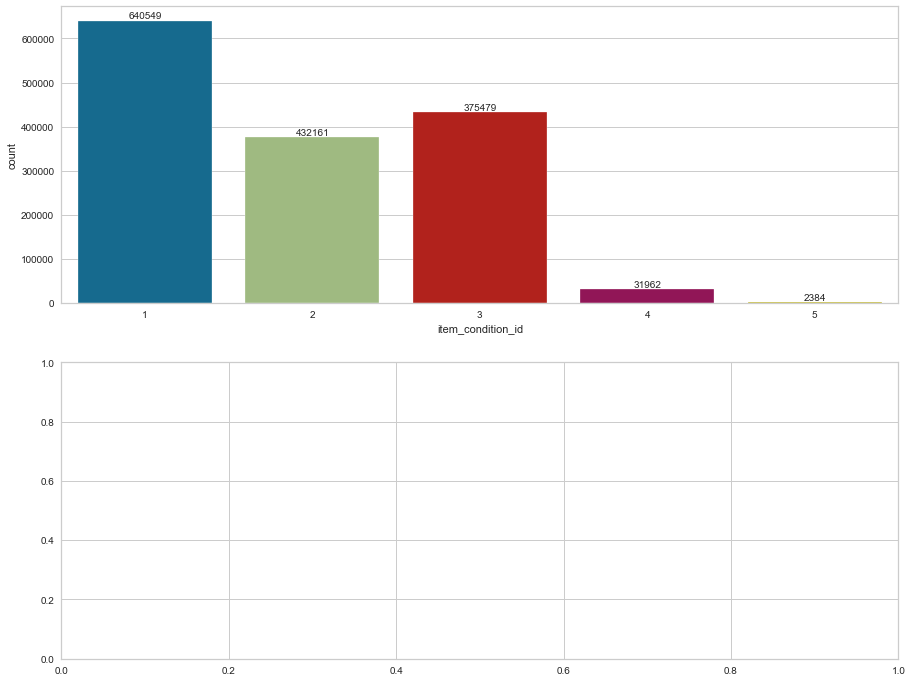

In [10]:
fig, ax = plt.subplots(2, 1, figsize = (15, 12))
sns.countplot(df_train['item_condition_id'], ax = ax[0])
squ = ax[0].patches
labels = df_train['item_condition_id'].value_counts().values
for squ, label in zip(squ, labels):
    height = squ.get_height()
    ax[0].text(squ.get_x() + squ.get_width()/2, height + 5, label, ha = "center", va = "bottom")
sns.boxplot(x = mercari_df['item_condition_id'], y = mercari_df.price, orient = "v", ax = ax[1])
plt.show()

In [11]:
df_train["item_condition_id"] = df_train["item_condition_id"].astype("category")

2) Category_name: has roughly 6,300 of null values and I need to split catergories.

In [12]:
df_train["category_name"].value_counts()

Women/Athletic Apparel/Pants, Tights, Leggings    60177
Women/Tops & Blouses/T-Shirts                     46380
Beauty/Makeup/Face                                34335
Beauty/Makeup/Lips                                29910
Electronics/Video Games & Consoles/Games          26557
                                                  ...  
Handmade/Bags and Purses/Wallet                       1
Handmade/Dolls and Miniatures/Primitive               1
Handmade/Geekery/Housewares                           1
Handmade/Patterns/Embroidery                          1
Men/Blazers & Sport Coats/Double Breasted             1
Name: category_name, Length: 1287, dtype: int64

In [13]:
# Split the Category and remove null-values
def split_cat(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Other_Null', 'Other_Null', 'Other_Null']

In [14]:
df_train['cat_Big'], df_train['cat_Med'], df_train['cat_Small']= zip(*df_train.category_name.apply(split_cat))
df_test['cat_Big'], df_test['cat_Med'], df_test['cat_Small']= zip(*df_test.category_name.apply(split_cat))

In [15]:
print(df_train['cat_Big'].value_counts())
print(df_train['cat_Big'].nunique())

Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_Big, dtype: int64
11


In [16]:
df_train['cat_Big'] = df_train['cat_Big'].astype("category")

In [17]:
print(df_train['cat_Med'].value_counts())
print(df_train['cat_Med'].nunique())

Athletic Apparel        134383
Makeup                  124624
Tops & Blouses          106960
Shoes                   100452
Jewelry                  61763
                         ...  
Candles                     64
Ceramics and Pottery        57
Dolls and Miniatures        49
Books and Zines             46
Quilts                      31
Name: cat_Med, Length: 114, dtype: int64
114


In [18]:
df_train['cat_Med'] = df_train['cat_Med'].astype("category")

In [19]:
print(df_train['cat_Small'].value_counts())
print(df_train['cat_Small'].nunique())

Pants, Tights, Leggings    60177
Other                      50224
Face                       50171
T-Shirts                   46380
Shoes                      32168
                           ...  
Dishwashers                    1
Ephemera                       1
Map                            1
Double Breasted                1
Frames                         1
Name: cat_Small, Length: 871, dtype: int64
871


In [20]:
df_train['cat_Small'] = df_train['cat_Small'].astype("category")

Now, Category_name is cleaned and removed the null_values.

3) Brand_name: has almost half of null values

In [21]:
df_train['brand_name'].value_counts()

PINK                 54088
Nike                 54043
Victoria's Secret    48036
LuLaRoe              31024
Apple                17322
                     ...  
Whiskas                  1
Upspring                 1
Lillie Rubin             1
Hoover                   1
JET Performance          1
Name: brand_name, Length: 4809, dtype: int64

In [22]:
df_train['brand_name'].nunique()

4809

In [23]:
df_train['brand_name'] = df_train['brand_name'].fillna(value = 'Other_Null')
df_train["brand_name"] = df_train["brand_name"].astype("category")

5) [shipping] 

In [24]:
df_train.shipping.value_counts()

0    819435
1    663100
Name: shipping, dtype: int64

In [25]:
df_train['shipping'] = df_train['shipping'].astype('category')

6) Item-description : Delete 4 of 'non-value' and 'No decription yet'

In [26]:
df_train["item_description"].value_counts()

No description yet                                                                                                                                                                                                                                                    82489
New                                                                                                                                                                                                                                                                    4099
Brand new                                                                                                                                                                                                                                                              3058
Good condition                                                                                                                                                                                      

In [27]:
df_train["item_description"].value_counts()

No description yet                                                                                                                                                                                                                                                    82489
New                                                                                                                                                                                                                                                                    4099
Brand new                                                                                                                                                                                                                                                              3058
Good condition                                                                                                                                                                                      

In [28]:
df_train["item_description"] = df_train["item_description"].fillna(value = 'Other_Null')
df_train['item_description'] = df_train['item_description'].astype(str)

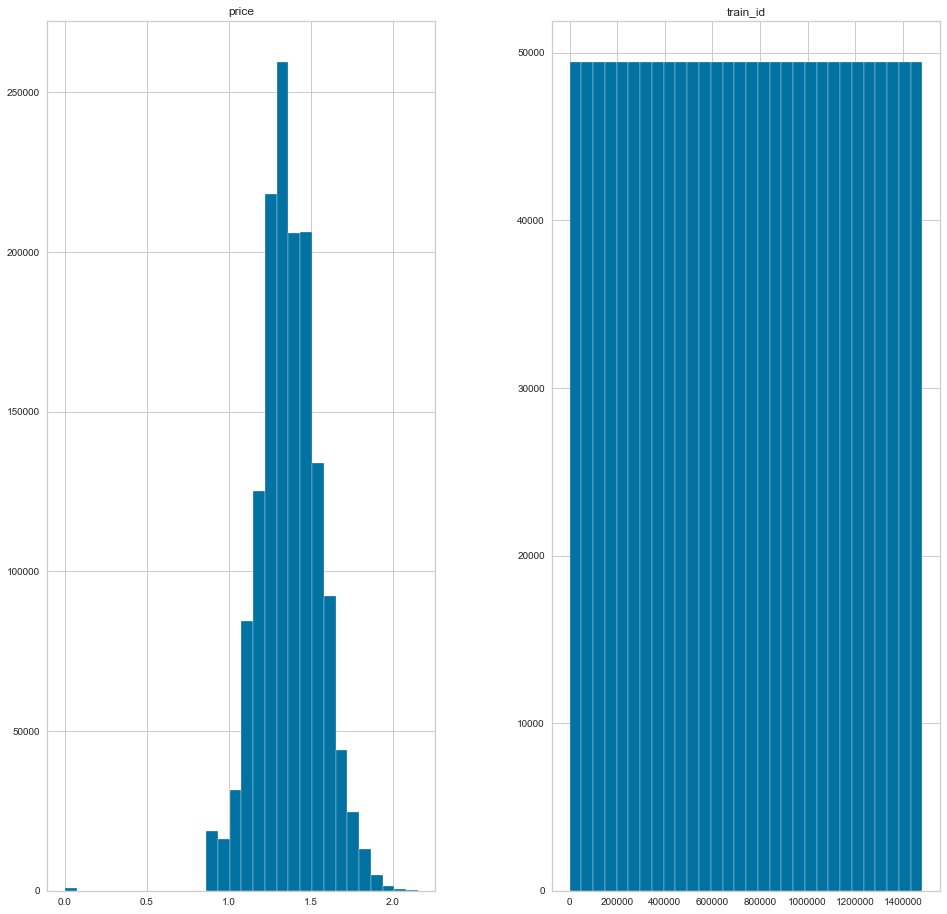

In [29]:
df_train.hist(bins=30, figsize=(16,16))
plt.show()

In [31]:
df_train.isnull().sum()

train_id                0
name                    0
item_condition_id       0
category_name        6327
brand_name              0
price                   0
shipping                0
item_description        0
cat_Big                 0
cat_Med                 0
cat_Small               0
dtype: int64

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 11 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null category
category_name        1476208 non-null object
brand_name           1482535 non-null category
price                1482535 non-null float64
shipping             1482535 non-null category
item_description     1482535 non-null object
cat_Big              1482535 non-null category
cat_Med              1482535 non-null category
cat_Small            1482535 non-null category
dtypes: category(6), float64(1), int64(1), object(3)
memory usage: 68.1+ MB


Apply exactly same format to the test data

In [33]:
df_test['brand_name'] = df_test['brand_name'].fillna("Other_Null")
df_test['item_description'] = df_test['item_description'].fillna("Other_Null")
df_test['item_description'] = df_test['item_description'].astype(str)
df_test['shipping'] = df_test['shipping'].astype('category')
df_test['item_condition_id'] = df_test['item_condition_id'].astype('category')



In [36]:
#To check the duplicates
df_train.duplicated().sum()

0

# Feature Encoding/Feature Vectorisation

In [45]:
vectorizer = TfidfVectorizer(max_df=0.9, max_features=1_000, stop_words = "english")

In [46]:
X_desc_train = vectorizer.fit_transform(df_train['item_description'])
X_desc_test  = vectorizer.transform(df_test['item_description'])

In [47]:
print("We have {} keywords from our Description Corpus".format(len(vectorizer.get_feature_names())))

We have 1000 keywords from our Description Corpus


In [48]:
print("Tf-IDF Matrix shape {}, the Original matrix shape {:,}".format(X_desc_train.get_shape(), df_train.shape[0]))

Tf-IDF Matrix shape (1482535, 1000), the Original matrix shape 1,482,535


In [ ]:
from sklearn.preprocessing import LabelBinarizer

#onehotencoding for brand_name, item_condtion, shipping

lb_brandname=LabelBinarizer(sparse_output=True)
x_brand=lb_brandname.fit_transform(df_train['brand_name'])
x_brand_test= lb_brandname.transform(df_test['brand_name'])

In [64]:
lb_itemcond=LabelBinarizer(sparse_output=True)
x_itemcond=lb_itemcond.fit_transform(df_train['item_condition_id'])
x_itemcond_test= lb_itemcond.transform(df_test['item_condition_id'])

In [53]:
lb_shipping=LabelBinarizer(sparse_output=True)
x_shipping=lb_shipping.fit_transform(df_train['shipping'])
X_shipping_test= lb_shipping.transform(df_test['shipping'])

In [61]:
name_cv = CountVectorizer()
X_name_train= name_cv.fit_transform(df_train['name']) 
X_name_test= name_cv.transform(df_test['name']) 

In [55]:
lb_cat_Big=LabelBinarizer(sparse_output=True)
x_cat_Big=lb_cat_Big.fit_transform(df_train['cat_Big'])
x_cat_Big_test= lb_cat_Big.transform(df_test['cat_Big'])

In [56]:
lb_cat_Medium=LabelBinarizer(sparse_output=True)
x_cat_Medium=lb_cat_Medium.fit_transform(df_train['cat_Med'])
x_cat_Medium_test= lb_cat_Medium.transform(df_test['cat_Med'])

In [57]:
lb_cat_Small=LabelBinarizer(sparse_output=True)
x_cat_Small=lb_cat_Small.fit_transform(df_train['cat_Small'])
x_cat_Small_test= lb_cat_Small.transform(df_test['cat_Small'])

In [67]:
import scipy
X_train = scipy.sparse.hstack((
                        x_brand,
                        X_desc_train,
                        x_itemcond,
                        x_shipping,
                        X_name_train,
                        x_cat_Big,
                        x_cat_Medium,
                        x_cat_Small
                        )).tocsr()

X_test = scipy.sparse.hstack((
                        x_brand_test,
                        X_desc_test,
                        x_itemcond_test,
                        X_shipping_test,
                        X_name_test,
                        x_cat_Big_test,
                        x_cat_Medium_test,
                        x_cat_Small_test
                        )).tocsr()

In [68]:
X_train.shape, X_test.shape

((1482535, 112569), (693359, 112569))

In [69]:
model = Ridge(solver='lsqr', fit_intercept=False)
model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='lsqr', tol=0.001)

In [70]:
preds = model.predict(X_test)

In [71]:
df_test['price'] = np.expm1(preds)

In [72]:
df_test[['test_id', 'price']].head()

,test_id,price
0,0,1.172651
1,1,1.299488
2,2,1.495463
3,3,1.332137
4,4,1.188007


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()
x_name = cnt_vec.fit_transform(df_train.name)

In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jesus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
tfidf = TfidfVectorizer(lowercase=True, 
                        stop_words=stopwords, 
                        tokenizer=tokenizer.tokenize,
                         min_df=0.01)


NameError: name 'tokenizer' is not defined

In [40]:
tfidf_train_sparse = tfidf.fit_transform(lemmatized_output)
tfidf_train_df = pd.DataFrame(tfidf_train_sparse.toarray(), 
                        columns=tfidf.get_feature_names())

tfidf_train_df.head()

NameError: name 'tfidf' is not defined

In [ ]:
#Token/Stopwords/ Stem or Lemma
# One Hot coding / LabelBinarizer
# count Vector (Short words: names)
# TD-IDF (Long words : Item_description)

Vectorisation

In [ ]:
mercari_df['item_description']

In [ ]:
import string, re
string.punctuation

In [ ]:
## setting stopwords and punctuations
sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©',
            'said', 'one', 'com', 'satirewire', '-', '–', '—', 'satirewire.com']
sw_set = set(sw_list)

In [ ]:
# we can define a function that removes stopwords 
def process_article(article):
    tokens = nltk.word_tokenize(article)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_set]
    return stopwords_removed

In [ ]:
# applying the above function to our data/features 
processed_data = list(map(process_article, mercari_df['item_description']))

In [ ]:
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

In [ ]:
#Lemmatization
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()  
# creating a list with all lemmatized outputs
lemmatized_output = []

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)
    

# Feature Vectorisation (Name: Countvector, Item_Desc : TfidfVector)

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re
tokenizer = RegexpTokenizer(r'\b\w{3,}\b')
stop_words = list(set(stopwords.words("english")))
stop_words += list(string.punctuation)
stop_words += ['__', '___']

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def rmv_emails_websites(string):
    new_str = re.sub(r"\S+@\S+", '', string)
    new_str = re.sub(r"\S+.co\S+", '', new_str)
    new_str = re.sub(r"\S+.ed\S+", '', new_str)
    new_str = re.sub(r"[0-9]+", '', new_str)
    return new_str

In [ ]:

#X = (mercari_df['name'] + ' ' + mercari_df['item_description']).values
#y = np.log1p(mercari_df['price'].values)

#X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state= 50)

In [ ]:
stop_words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()
x_name = cnt_vec.fit_transform(mercari_df.name)




In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf_descp = TfidfVectorizer(max_features = 50000, ngram_range = (1,3), stop_words ='english')
#x_descp = tfidf_descp.fit_transform(lemmatized_output)





tfidf = TfidfVectorizer(lowercase=True, 
                        stop_words=stop_words, 
                        tokenizer=tokenizer.tokenize,
                         min_df=0.01)
tfidf_train_sparse = tfidf.fit_transform(lemmatized_output)
tfidf_train_df = pd.DataFrame(tfidf_train_sparse.toarray(), 
                        columns=tfidf.get_feature_names())

tfidf_train_df.head()

In [ ]:
type(tfidf_train_sparse)
tfidf_train_sparse.shape

In [ ]:
type(x_name)
x_name.shape


In [ ]:
lb_cat_Big=LabelBinarizer(sparse_output=True)
x_cat_Big=lb_cat_Big.fit_transform(mercari_df['cat_Big'])
lb_cat_Medium=LabelBinarizer(sparse_output=True)
x_cat_Medium=lb_cat_Medium.fit_transform(mercari_df['cat_Med'])
lb_cat_Small=LabelBinarizer(sparse_output=True)
x_cat_Small=lb_cat_Small.fit_transform(mercari_df['cat_Small'])

In [ ]:
print(type(x_brand),type(x_itemcond),type(x_shipping)) 

In [ ]:
print(type(x_cat_Big),type(x_cat_Medium),type(x_cat_Small)) 

In [ ]:
print('x_brand shape:{0}, x_itemcond:{1}'.format(x_brand.shape,x_itemcond.shape))

In [ ]:
print('x_shipping:{0}, x_cat_Big:{1}'.format(x_shipping.shape,x_cat_Big.shape))

In [ ]:
print('x_cat_Medium shape:{0}, x_cat_Small:{1}'.format(x_cat_Medium.shape,x_cat_Small.shape))

In [ ]:
vectorizer = TfidfVectorizer(analyzer="char", lowercase=True, ngram_range=(1, 2), strip_accents="unicode")
ngram_features = vectorizer.fit_transform(df["strings"].values.astype(str))

list_other_features = ["entropy", "string_length"]
other_features = csr_matrix(df[list_other_features].values)

joined_features = scipy.sparse.hstack((ngram_features, other_features))

In [ ]:
from scipy import sparse
sparse.hstack
import scipy.integrate as integrate

In [ ]:
sparse_matrix_list1 = (x_name,x_brand,x_itemcond, x_shipping, lb_cat_Big, lb_cat_Medium, lb_cat_Small)
from scipy.sparse import hstack
from scipy.sparse import csr_matrix

In [ ]:

joined_features = scipy.sparse.hstack((tfidf_train_sparse,sparse_matrix_list1))


In [ ]:
from scipy.sparse import hstack
sparse_matrix_list1 = (x_name, tfidf_train_sparse,x_brand,x_itemcond, x_shipping, lb_cat_Big, lb_cat_Medium, lb_cat_Small)

In [ ]:
def transform(self, sparse_matrix_list1)

In [ ]:
def predict(self, df):
        X_desc = self.wb_desc.transform(df["item_description"])
        X_desc = X_desc[:, self.desc_indices]

        X_name = 2 * self.cv_name.transform(df["name"])
        X_name2 = 0.5 * self.cv_name2.transform(df["name"])

        X_category0 = self.cv_cat0.transform(df['subcat_0'])
        X_category1 = self.cv_cat1.transform(df['subcat_1'])
        X_category2 = self.cv_cat2.transform(df['subcat_2'])
        X_brand = self.cv_brand.transform(df['brand_name'])
        X_condition = self.cv_condition.transform((df['item_condition_id'] + 10 * df["shipping"]).apply(str))

        df["cat_brand"] = [a + " " + b for a, b in zip(df["category_name"], df["brand_name"])]
        X_cat_brand = self.cv_cat_brand.transform(df["cat_brand"])
        X_desc3 = self.desc3.transform(df["item_description"])

        X = hstack((X_condition,
                    X_desc, X_brand,
                    X_category0, X_category1, X_category2,
                    X_name, X_name2,
                    X_cat_brand, X_desc3)).tocsr()

        return self.model.predict(X) 

In [ ]:
from scipy.sparse import hstack
sparse_matrix_list1 = (x_name, tfidf_train_sparse,x_brand,x_itemcond, x_shipping, lb_cat_Big, lb_cat_Medium, lb_cat_Small)

x_features_sparse =hstack(sparse_matrix_list1).toscr()

del X_features_sparse
gc.collect()


# Model

# Baselie Model (SGDRegressor with ordinary least squares.)


In [ ]:
# I will be using SGDRegressor with ordinary least squares.
# Also, using mean squared error as the eval metric, since negative values crash mean squared log error.

model = SGDRegressor(loss='squared_loss', penalty='l2', random_state=seed, max_iter=5)
params = {'penalty':['none','l2','l1'],
          'alpha':[1e-4, 2e-4, 5e-4, 1e-3, 2e-3, 5e-3, 1e-2, 2e-2, 5e-2, 0.1]}
gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  scoring='neg_mean_squared_error',
                  n_jobs=1,
                  cv=5,
                  verbose=3)

gs.fit(X_train_vect, y_train)


In [ ]:
model = gs.best_estimator_
print(gs.best_params_)
print(gs.best_score_)

In [ ]:
pipe = Pipeline([('vect',vect),('model',model)])

y_pred = pipe.predict(X_test)



In [ ]:
print(np.sqrt(mean_squared_log_error(np.exp(y_test)-1, np.exp(y_pred)-1)))

In [ ]:
print(types(x_features_sparse),x_features_sparse.shape)

In [ ]:
def rmsle (y, y_pred):
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y_pred),2)))
def evaluate_org_price(y_test,preds):
    preds_exmpm = np.expm1(preds)
    y_test_exmpm = np.expm1(y_test)
    
    rmsle_result = rmsle(y_test_exmpm,preds_exmpm)
    return rmsle_result


In [ ]:
import gc
from scipy.sparse import hstack

def model_train_predict(model, matrix_list):
    x = hstack(matrix_list).tscr()
    
    x_train, x_test, y_train, y_test = train_test_split(x, mercari_df.price, test_size = 0.2,random_state= 50)
    
    model.fit(x_train,y_train)
    preds = mdel.predict(x_test)
    
    del x, x_train, x_test, y_train
    gc.collect()
    
    return preds, y_test

In [ ]:
linear_model = Ridge(solver = "lsqr", fit_intercept=False)
sparse_matrix_list = (x_name,x_brand,x_itemcond,x_shipping, lb_cat_Big, lb_cat_Medium, lb_cat_Small)
linear_preds, y_test = model_train_predict(model = linear_model, matrix_list = sparse_matrix_list)
print('exception of Item description:', evaluate_org_price(y_test, linear_preds))

In [ ]:

sparse_matrix_list = (x_name, x_descp,x_brand,x_itemcond,x_shipping, lb_cat_Big, lb_cat_Medium, lb_cat_Small)
linear_preds, y_test = model_train_predict(model = linear_model, matrix_list = sparse_matrix_list)
print('With Item description:', evaluate_org_price(y_test, linear_preds))

In [ ]:
Item desciption shows the better result

In [ ]:
LightGBM